# Logistic Regression

## Topics covered in this report :-

### 1. What is Regression?
### 2. Logistic Regression: What and Why?
### 3. Use-Cases
### 4. Demo

## What is Regression?

 Regression Analysis is a predictive modelling technique.
 It estimates the relationship between a dependent(target) and an independent variable(predictor).

## Logistic Regression: What and Why?

Logistic Regression results in a binary format which is used to predict the outocome of a categorical dependent variable. So the outcome should be discrete/categorical such as:

###### 0 OR 1
###### Yes OR No
###### True OR False
###### High OR Low

## Why Not Linear Regression?

Since our value of Y will be between 0 and 1, the linear line has to be clipped at 0 and 1.

With this, our resulting curve cannot be formulated into a single formula. Hence we came up with Logistic!

## Logistic Regression Equation

###### The Logistic Regeression Equation is derived from the Straight Line Equation

###### Equation of a straight line
Y = C + B1X1 + B2X2 + ... -> Range is from -(infinity) to (infinity)

###### Let's try to reduce the Logistic Regression Equation from Straight Line Equation
Y = C + B1X1 + B2X2 + ... -> In Logistic equation Y can be only from 0 to 1

###### Now, to get the range of Y between 0 and infinity, let's transform Y
Y Y= 0 then 0
1-Y Y= 1 then infinity -> Now, the range is between 0 to infinity

###### Let us transform it further, to get the range between -(infinity) and (infinity)
log[Y/(1-Y)] -> Y = C + B1X1 + B2X2 + ... -> Final Logistic Regression Equation

## Linear Vs Logistic Regression

###### Linear Regression :-

1. Continuous variables.
2. Solves Regression Problems.
3. Straight Line

###### Logistic Regression :-
1. Categorical variables
2. Solves Classification Problems
3. S-Curve

## Logistic Regression : Use - Cases

1. Weather Prediction.
2. Classification Problems.
3. Determines Illness.

# DEMO

## Dataset :-

### Description :

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to 
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Acknowledgements :

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor: 
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

### Inspiration :

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

See if you can find any other trends in heart data to predict certain cardiovascular events or find any clear indications of heart health.

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

disease_data = pd.read_csv("heart.csv")
disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Attributes Information :

1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [52]:
print("# number of data available:" +str(len(disease_data.index)))

# number of data available:303


# Analyzing Data

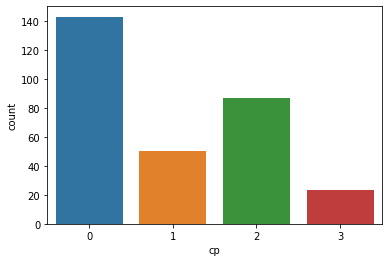

In [53]:
 sns.countplot(x="cp", data=disease_data)

This Graph shows the different levels of chest pain that a patient has, it has 4 values ranging from mild to severe.

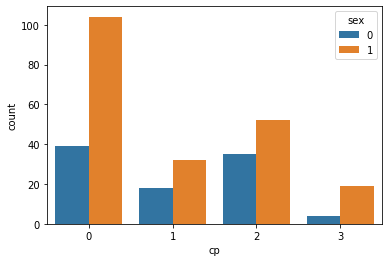

In [54]:
sns.countplot(x="cp",hue="sex",data=disease_data)

This graph shows that males in general are more susceptiple to all levels of chest pain than females.

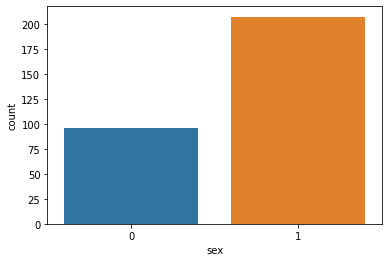

In [55]:
 sns.countplot(x="sex", data=disease_data)

but at the same time, we had more male number of patients in our dataset than females.

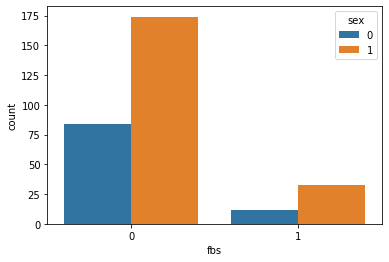

In [56]:
sns.countplot(x="fbs",hue="sex",data=disease_data)

With this graph we can conclude that males in general have fasting blood sugar > 120 mg/dl. 

The normal fasting blood glucose level is below 100 mg/dl. A person with prediabetes has a fasting blood glucose level between 100 and 125 mg/dl. If the fasting blood glucose level is to 126 mg/dl or above, a person is considered to have diabetes.

This in turns gives us a prediction that males are more susceptible to diabetes than women.

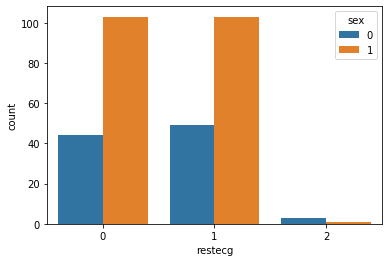

In [57]:
sns.countplot(x="restecg",hue="sex",data=disease_data)

resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)

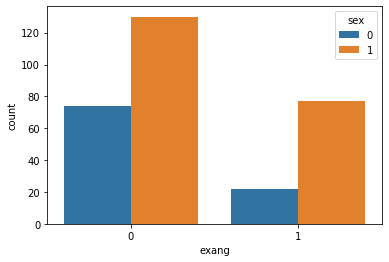

In [58]:
sns.countplot(x="exang",hue="sex",data=disease_data)

This graph gives the depiction of exercise induced angina (1 = yes; 0 = no).

Angina is a type of chest pain caused by reduced blood flow to the heart. Angina (an-JIE-nuh or AN-juh-nuh) is a symptom of coronary artery disease.

This shows that Males are more likely to experience vise squeezing on their chest or a heavy weight lying on their chest. This can also lead to higher chest pain and discomfort.

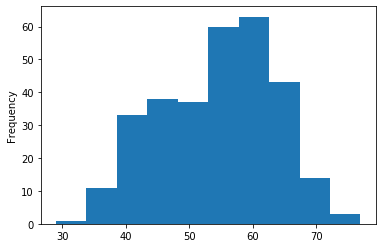

In [59]:
disease_data["age"].plot.hist()

This histograph shows us the age group of patients that were included in the dataset. This shows us that on average the age group of patients was between 55 to 65 of age.


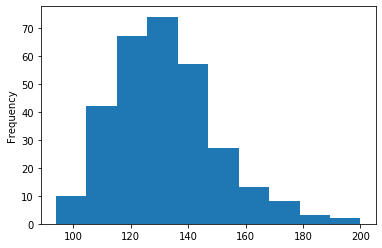

In [60]:
disease_data["trestbps"].plot.hist()

This histograph shows us that the average resting blood pressure (in mm Hg on admission to the hospital) for the patients ranges from 120mm to 150mm Hg.

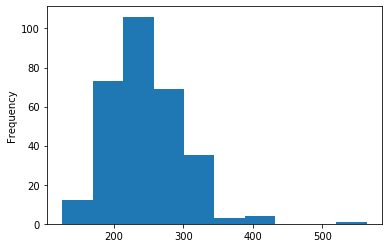

In [61]:
disease_data["chol"].plot.hist()

This histograph shows us that the average serum cholestoral of all the patients ranged between 150-350 in mg/dl.

In [62]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Wrangling

In [63]:
disease_data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

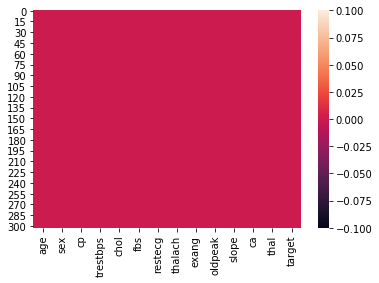

In [65]:
sns.heatmap(disease_data.isnull())

This heatmap shows us that our Dataset has no null values for any fields which is a good thing since we don't need to perform data wrangling.

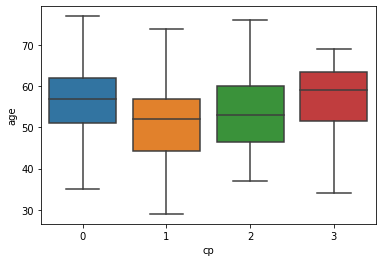

In [66]:
sns.boxplot(x="cp", y="age", data=disease_data)

This graph shows us that people of older age either show no symtomps of chest pain or they have extreme chest pains

# Train Data

In [67]:
X= disease_data.drop("exang",axis=1)
y= disease_data["exang"]

We will be training our model for predicting exercise induced anigna in patients.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logmodel=LogisticRegression(solver='lbfgs',max_iter=7600)

In [72]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=7600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

After fitting my model using logmodel.fit() and passing in the X_train and y_train we get all the details of Logistic Regression. Here we get class_weight, dual, fit_intercept, intercept_scaling, l1_ratio, max_iter, multi_class, n_jobs, pnealty, random_state, solver, tot, verbose, warm_start. We will now start making the predictions.

In [73]:
predictions = logmodel.predict(X_test)

In [74]:
from sklearn.metrics import classification_report

In [75]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.77      0.84      0.80        61\n           1       0.60      0.50      0.55        30\n\n    accuracy                           0.73        91\n   macro avg       0.69      0.67      0.67        91\nweighted avg       0.72      0.73      0.72        91\n'

Here I have used classificstion_report() and inside this i passed in y_test and the predictions. Above is the classification report that we get. Here we have the precision, recall, f1-score and support. So here we the values of precision as 60, 50 and 55 which is not that bad. Now in order to calculate the accuracy as well i can use the concept of confusion matrix. So now i will print the confusion matrix.

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
confusion_matrix(y_test,predictions)

array([[51, 10],
       [15, 15]])

Confusion_matrix is nothing but a 2x2 matrix which has 4 outcomes, this basically tells us how accurate our values are. Here we have the columns as PN(Predicted No) and PY(Predicted Yes) and we have two rows AN(Actual No) and AY(Actual Yes). As you can see in the confusion_matrix we got 4 outcmes. 51 is the value where the model has Predicted No and actually it was No as well. Similarly 15 is the value where the model has Predicted Yes and actually it was Yes as well. So in order to calculate the accuracy we just need to calculate the sum of these two values and divide the whole by the sum. Here these two values tells us where the model has actually predicted the correct output. Here 51 is our True Negative, 10 is our False Positive, 15 is our False Nagative and 15 is our True Positive. Now in order to calculate the accuracy we don't have to do it manually. We can just import accuracy_score function and get the results from that.

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,predictions)

0.7252747252747253

After calling the accuracy_score function and passing in the parameters y_test and predictions we get an overall accuracy of 72 which is quite good. If we have to do it manually we can just add the values of True Negative and True Positive wich is 51+15=66 and then we divide it by the sum of all the 4 numbers i.e. 66/(51+10+15+15)=66/91=72%.